# Autoencoder Network

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

ENCODING_DIM = 64 # Compression factor 24.5

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,),name='ImageInput')

encoded = Dense(ENCODING_DIM, activation='relu',name='Encoder')(input_img)

decoded = Dense(784, activation='sigmoid',name='Decoder')(encoded)

In [4]:
autoencoder = Model(input_img, decoded)

In [5]:
32*784+32

25120

In [6]:
32*784+784

25872

In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 784)               0         
_________________________________________________________________
Encoder (Dense)              (None, 64)                50240     
_________________________________________________________________
Decoder (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 104us/step - loss: 0.3492 - acc: 0.7599 - val_loss: 0.2692 - val_acc: 0.7966
Epoch 2/25
60000/60000 [==============================] - 5s 88us/step - loss: 0.2595 - acc: 0.7987 - val_loss: 0.2454 - val_acc: 0.7976
Epoch 3/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.2334 - acc: 0.7986 - val_loss: 0.2201 - val_acc: 0.7980
Epoch 4/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.2124 - acc: 0.7988 - val_loss: 0.2027 - val_acc: 0.7995
Epoch 5/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.1976 - acc: 0.8003 - val_loss: 0.1902 - val_acc: 0.8003
Epoch 6/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.1869 - acc: 0.8016 - val_loss: 0.1810 - val_acc: 0.8017
Epoch 7/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1785 - acc: 0.8029 - val_loss: 0.1735 - val_ac

In [15]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(ENCODING_DIM,))

decoder_layer = autoencoder.get_layer('Decoder')

decoder = Model(encoded_input, decoder_layer(encoded_input))


In [16]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
Decoder (Dense)              (None, 784)               50960     
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [17]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 784)               0         
_________________________________________________________________
Encoder (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [18]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

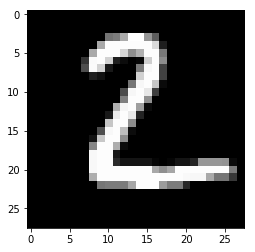

In [24]:
plt.imshow(x_test[1].reshape(28,28))

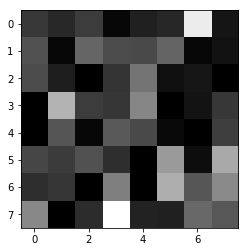

In [22]:
plt.imshow(encoded_imgs[1].reshape(8,8))

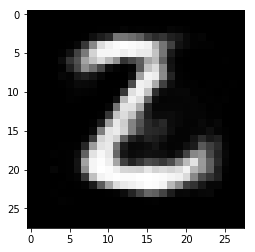

In [25]:
plt.imshow(decoded_imgs[1].reshape(28,28))

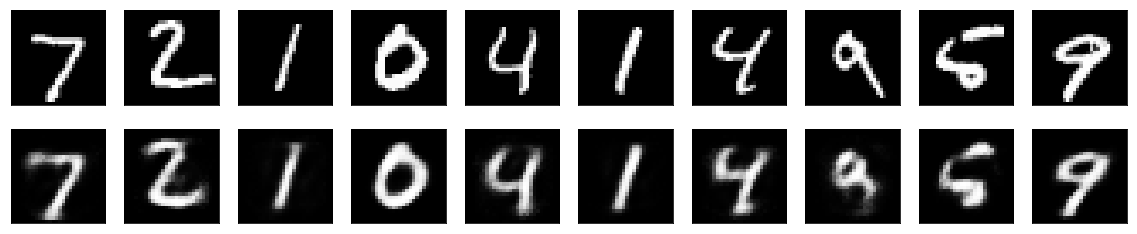

In [13]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

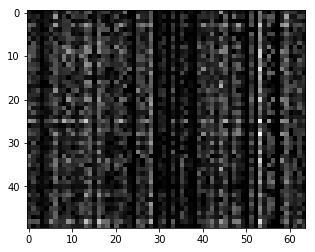

In [14]:
plt.imshow(encoded_imgs[:50],)